Módulo 3. Exploratory Data Analysis with Python

Alumno: Enrique Ricardo García Hernández

Matrícula: A01315428

Fecha: 21 Oct 2022

Objetivos del análisis exploratorio
1. Entendimiento de las características del dataset
2. Extracto de variables importantes
3. Encontrar relaciones entre las variable

Uso de diferentes técnicas de análisis exploratorio sobre las características de las variables del dataset
1. Análisis descriptivo;
2. Agrupaciones;
3. Análisis de varianza
4. Correlaciones entre las variables

In [2]:
#Estadística descriptiva (previo a la realización de modelos más eleborados)
import pandas as pd
import numpy as np
ruta="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df=pd.read_csv(ruta,header=None)
#Actualizar los nombres de las columnas
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num_of_doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height',
         'curb-weight','engine-type','num_of-cylinder','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num_of_doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num_of_doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num_of-cylinder       object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [23]:
df['price'] = pd.to_numeric(df['price'], errors='coerce') #cambiamos de string a numérica y los variables "extraños" los dejamos como NaN
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce') #cambiamos de string a numérica y los variables "extraños" los dejamos como NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') #cambiamos de string a numérica y los variables "extraños" los dejamos como NaN

In [7]:
#Cálculo de estadísticos básicos
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [8]:
#Resumen / sumarización de los datos categóricos
drive_wheels_counts=df['drive-wheels'].value_counts()
drive_wheels_counts #Cuenta para cada valor de la variable categorica "drive_wheels" en número de veces de recurrencia

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

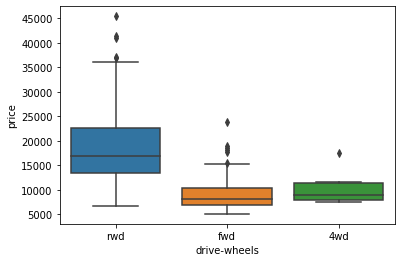

In [9]:
#Generación de box-plot para visualizar posibles outliers
import seaborn as sns
sns.boxplot(x='drive-wheels', y='price',data=df)
#Por cada tipo de valor de la variable drive-wheels, vemos la distribución del precio

Text(0, 0.5, 'Price')

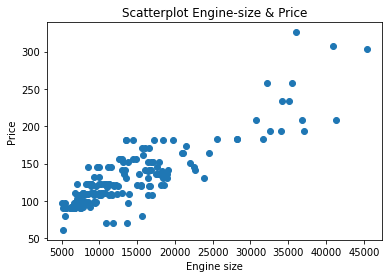

In [10]:
#Entender la razón entre 2 variables, en este caso es engine-size & price
import matplotlib.pyplot as plt

y=df['engine-size']
x=df['price']
plt.scatter(x,y)

plt.title("Scatterplot Engine-size & Price")
plt.xlabel('Engine size')
plt.ylabel('Price')
#Confome el tamaño de Engine size aumenta ==> el precio también
#Primeros indicios de que podría existir una relación lineal entre engine-size y precio

In [11]:
#GroupBy
df_test=df[['drive-wheels','body-style','price']]
df_grp=df_test.groupby(['drive-wheels','body-style'],as_index=False).mean() #Calculamos el precio promedio por cada grupo de drive-wheels & body-style y se queda almacenado en la variable df_grp
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [12]:
#Uso del método pivot
df_pivot=df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

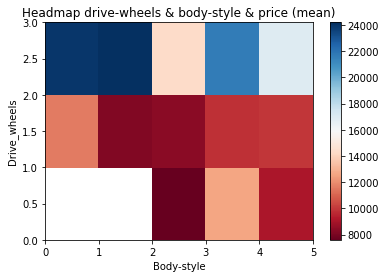

In [13]:
#Uso de headmap
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.title("Headmap drive-wheels & body-style & price (mean)")
plt.xlabel('Body-style')
plt.ylabel('Drive_wheels')
plt.show()

In [14]:
#Análisis de varianza ANOVA
#Encontrar correlaciones entre diferentes grupos de variables categóricas
#F-test-score. Variación entre la media del muestra es mayor que la variación de las observaciones entre los grupos
#p-score. Nivel de confianza
df_anova=df[['make','price']]
grouped_anova=df_anova.groupby(['make'])
from scipy.stats import f_oneway
anova_results_1=f_oneway(grouped_anova.get_group('honda')['price'],grouped_anova.get_group('subaru')['price'])
anova_results_1
#Los precios entre Honda y Subaru NO son significativamente diferentes, el resultado de la prueba F-Score es menor a 1 y el pvalue es mayor que 0.05

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [15]:
#Ejercicio entre Honda & Jaguar
anova_results_2=f_oneway(grouped_anova.get_group('honda')['price'],grouped_anova.get_group('jaguar')['price'])
anova_results_2
#Los precios entre Honda & Jaguar son estadísticamente diferentes, el pvalue <0.05 y el F=401 (valor muy grande)

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

(-1487.874579212807, 53168.0065432467)

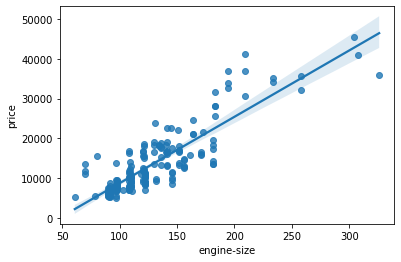

In [16]:
#Correlaciones
#Correlation doesn't imply causation
sns.regplot(x='engine-size',y='price', data=df)
plt.ylim()
#Correlación positiva

(0.0, 48160.02941243363)

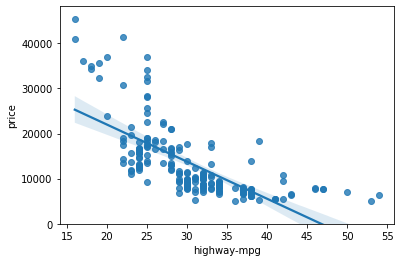

In [18]:
sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)
#Correlación negativa

(0.0, 47414.1)

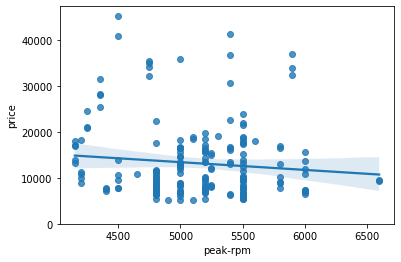

In [22]:
sns.regplot(x='peak-rpm',y='price', data=df)
plt.ylim(0,)
#Correlación debil

In [52]:
meanhp=df['horsepower'].mean()
df['horsepower'].replace(np.NaN,meanhp) #Cambia los missing values por el valor de la media que calculamos antes

#meanp=df['price'].mean()
#df['price'].replace(np.nan,meanp) #Cambia los missing values por el valor de la media que calculamos antes

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [60]:
df=df.dropna(how='all')

In [71]:
df_paso=df[['horsepower','price']]
df_paso.corr()

,horsepower,price
horsepower,1.000000,0.810533
price,0.810533,1.000000


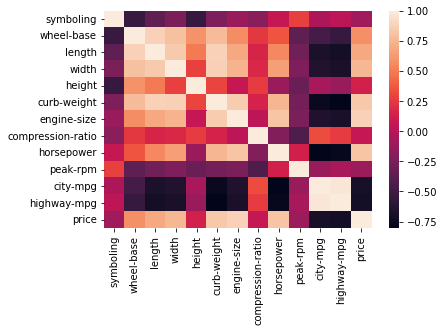

In [72]:
#Headmap
sns.heatmap(df.corr());

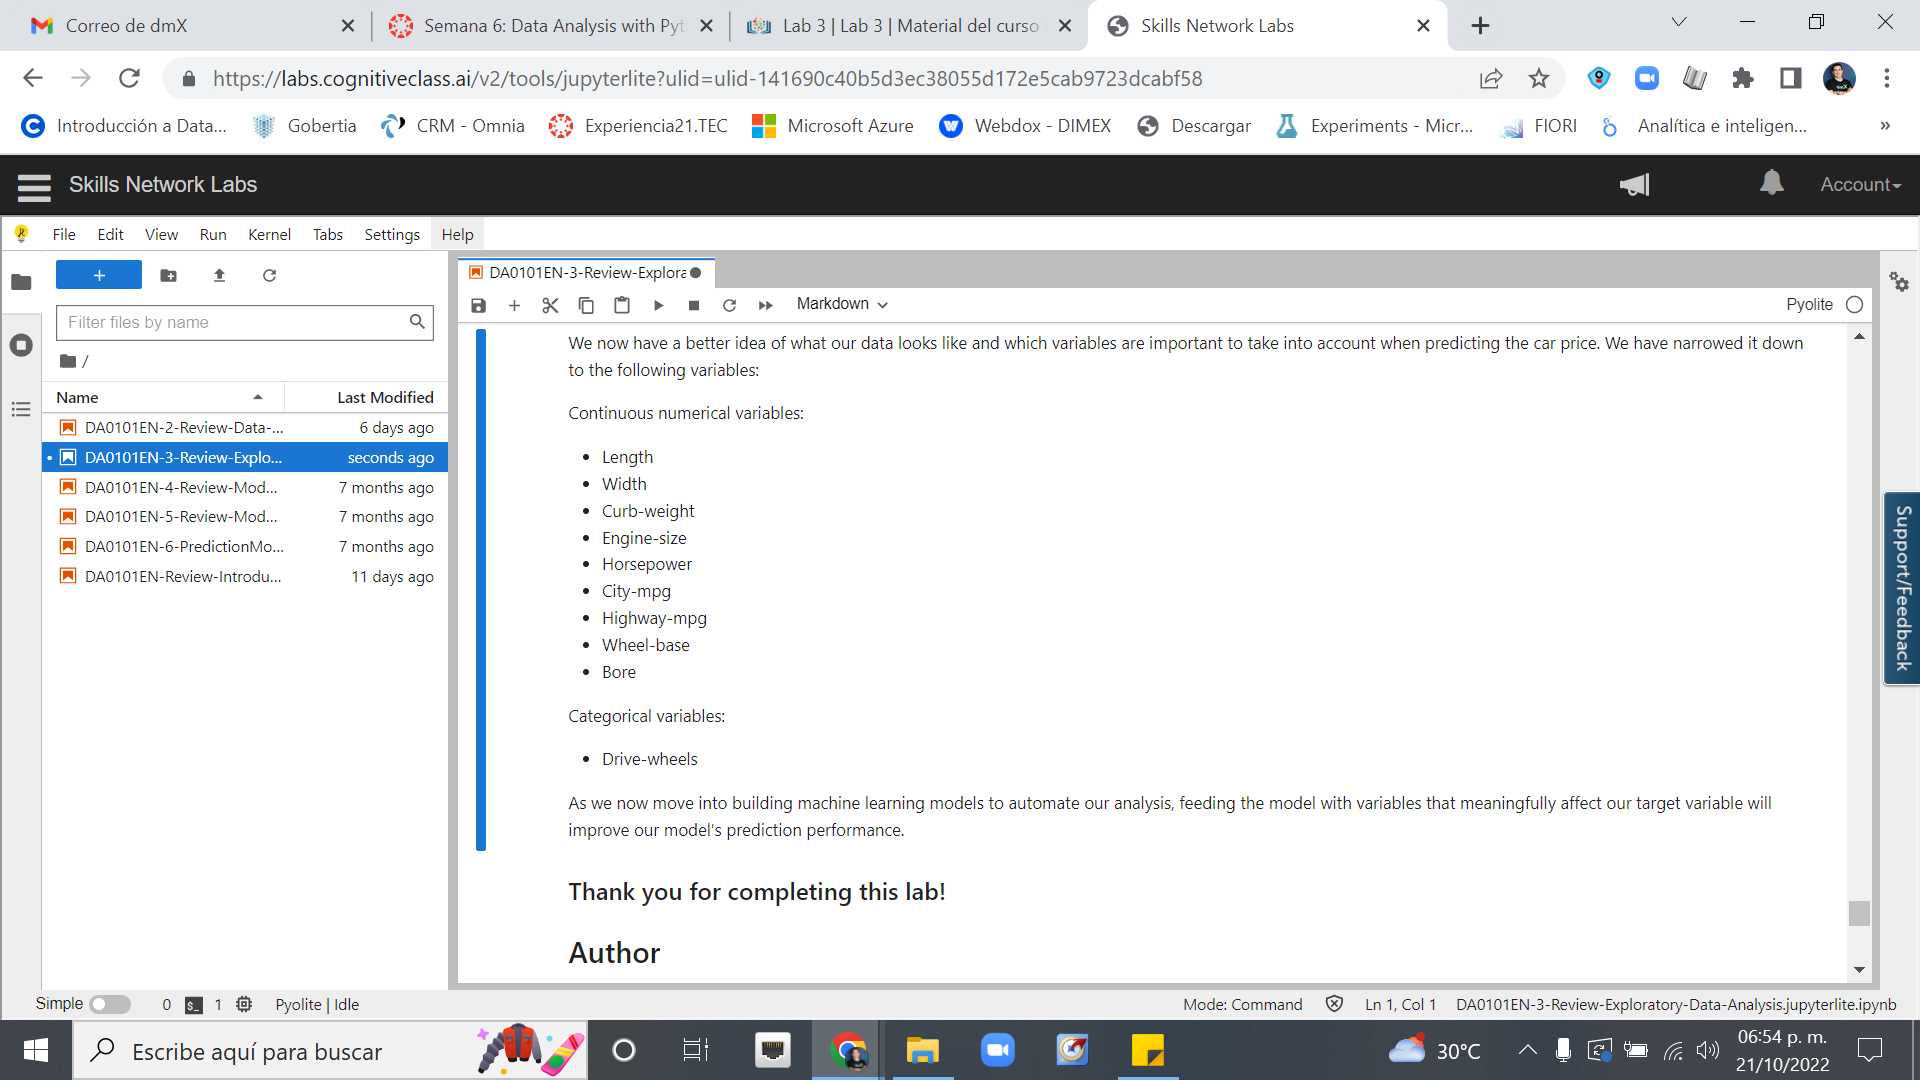

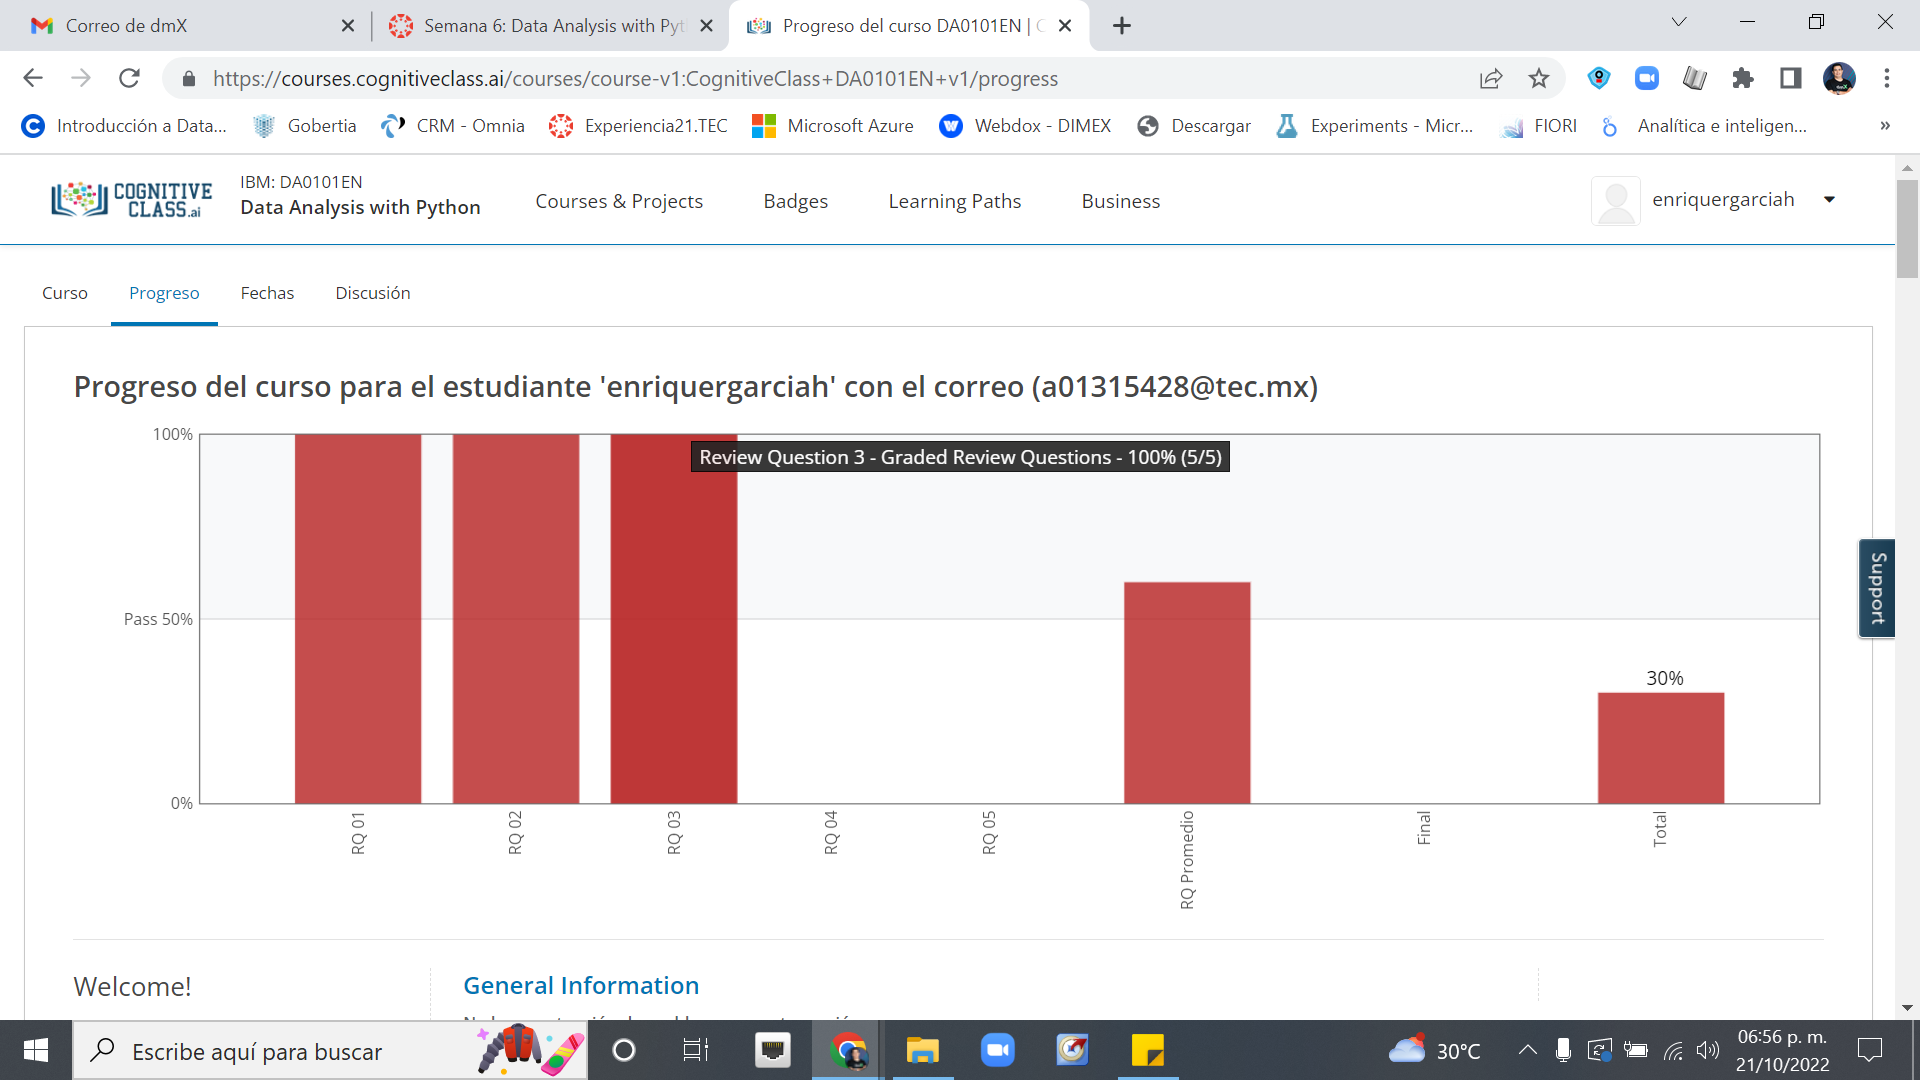